In [3]:
import pandas as pd
from pandas import Series,DataFrame
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook

In [4]:
#Read xlsx sheet and carry out some basic filtering / clean up
def load_spreadsheet(sheet_name):
    df = pd.read_excel('Cancer/cancer-historical-summary-1948-2020.xlsx', sheet_name, skiprows=[0,1,2,4])
    df.dropna(subset='Brain (C71)', inplace=True)
    #have found it necessary to create the 'Year' column a second time, as for some reason when dropping unnamed columns it would set all 'Year' values to NAN 
    #if I took approach of simply renaming 'Unnamed: 0' to 'Year'
    df.insert(loc=0, column='Year', value=df['Unnamed: 0'])
    df.drop(df.filter(regex='Unnamed').columns, axis=1, inplace=True)
    df = df.fillna(0) 
    return df

In [5]:
sheets_to_load = {'Regs_Total':None,'Deaths_Total':None,'Regs_Male':None,'Regs_Female':None,'Deaths_Male':None,'Deaths_Female':None}

In [6]:
dfd = {}
for name in sheets_to_load:
    dfd[name] = pd.DataFrame(load_spreadsheet(name))

/tmp/ipykernel_4463/3031378163.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/tmp/ipykernel_4463/3031378163.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/tmp/ipykernel_4463/3031378163.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)
/tmp/ipykernel_4463/3031378163.py:9: 

In [7]:
for sheet in sheets_to_load:
    globals()[sheet] = dfd[sheet]

In [8]:
%whos DataFrame

Variable        Type         Data/Info
--------------------------------------
Deaths_Female   DataFrame        Year All cancers (C00<...>n\n[66 rows x 23 columns]
Deaths_Male     DataFrame        Year All cancers (C00<...>n\n[66 rows x 20 columns]
Deaths_Total    DataFrame        Year All cancers (C00<...>n\n[66 rows x 18 columns]
Regs_Female     DataFrame        Year  All cancers (C0<...>n\n[73 rows x 23 columns]
Regs_Male       DataFrame        Year  All cancers (C0<...>n\n[73 rows x 20 columns]
Regs_Total      DataFrame        Year  All cancers (C0<...>n\n[73 rows x 18 columns]


In [13]:
Regs_Total

,Year,"All cancers (C00–C96, D45–D47)","Lip, Oral Cavity and Pharynx (C00–C14)",Oesophagus (C15),Stomach (C16),Colorectum and anus (C18–C21),Liver and intrahepatic bile ducts (C22),Pancreas (C25),Lung & Trachea (C33–C34),Melanoma (C43),"Kidney and other urinary (C64–C66, C68)",Bladder (C67),Brain (C71),Thyroid (C73),Hodgkin lymphoma (C81),"Non-Hodgkin lymphoma (C82–C86, C96)",Myeloma (C90),Leukaemia (C91–C95)
0,1948,3474.0,251.0,53.0,305.0,448.0,39.0,74.0,156.0,51.0,44.0,75.0,43.0,16.0,23.0,66.0,12.0,97.0
1,1949,3675.0,233.0,51.0,321.0,401.0,38.0,93.0,153.0,37.0,41.0,84.0,56.0,18.0,32.0,77.0,8.0,83.0
2,1950,3605.0,224.0,46.0,352.0,409.0,50.0,95.0,175.0,39.0,43.0,79.0,56.0,19.0,44.0,71.0,9.0,97.0
3,1951,3787.0,204.0,59.0,294.0,439.0,43.0,108.0,201.0,66.0,72.0,77.0,65.0,17.0,31.0,105.0,13.0,90.0
4,1952,3968.0,242.0,75.0,319.0,469.0,58.0,86.0,231.0,64.0,61.0,74.0,69.0,25.0,31.0,82.0,16.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2016,24385.0,528.0,260.0,413.0,3229.0,356.0,597.0,2309.0,2574.0,657.0,425.0,334.0,358.0,95.0,932.0,412.0,701.0
69,2017,24735.0,559.0,300.0,409.0,3093.0,375.0,572.0,2287.0,2559.0,672.0,424.0,334.0,326.0,113.0,916.0,414.0,743.0
70,2018,26364.0,583.0,290.0,407.0,3277.0,386.0,639.0,2415.0,2742.0,696.0,466.0,345.0,305.0,140.0,980.0,417.0,777.0
71,2019,26509.0,549.0,336.0,389.0,3425.0,402.0,729.0,2366.0,2732.0,655.0,481.0,325.0,363.0,120.0,983.0,441.0,779.0


In [14]:
Deaths_Total

,Year,"All cancers (C00–C96, D45–D47)","Lip, Oral Cavity and Pharynx (C00–C14)",Oesophagus (C15),Stomach (C16),Colorectum and anus (C18–C21),Liver and intrahepatic bile ducts (C22),Pancreas (C25),Lung & Trachea (C33–C34),Melanoma (C43),"Kidney and other urinary (C64–C66, C68)",Bladder (C67),Brain (C71),Thyroid (C73),Hodgkin lymphoma (C81),"Non-Hodgkin lymphoma (C82–C86, C96)",Myeloma (C90),Leukaemia (C91–C95)
7,1955,3171,56,79,450,527,81,143,340,39,67,70,88,20,32,63,32,144
8,1956,3155,73,69,442,507,76,146,374,39,63,77,83,15,37,75,30,137
9,1957,3213,64,67,415,539,89,144,403,37,68,76,90,10,18,88,34,149
10,1958,3297,75,73,446,539,78,155,399,38,59,88,102,16,29,81,35,147
11,1959,3339,61,67,404,518,83,146,423,47,70,97,84,16,35,86,40,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2016,9518,142,215,313,1292,264,522,1758,363,233,224,273,28,10,316,205,333
69,2017,9638,140,237,288,1229,288,542,1781,310,243,248,266,24,14,331,212,312
70,2018,9818,166,251,274,1248,281,537,1788,296,258,231,314,29,24,328,208,359
71,2019,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–,–


In [178]:
def Sum_of_period(df,min_year,max_year):
    df = df[(df['Year'] > min_year) & (df['Year'] <= max_year)]
    df = df.drop('Year', axis = 1)
    df = df.astype(int)
    df = df.sum()
    return df

In [184]:
def Join_Comp(d1,d2,col1,col2,min_year,max_year):
    df1 = pd.DataFrame(Sum_of_period(d1,min_year,max_year))
    df1 = df1.rename(columns={0: col1})
    df2 = pd.DataFrame(Sum_of_period(d2,min_year,max_year))
    df1[col2] = df2[0]
    return df1

In [180]:
min_year = 2008
max_year = 2018
c1 = 'Regs_Total'
c2 = 'Deaths_Total'
compdf = Join_Comp(Regs_Total,Deaths_Total,c1,c2,min_year,max_year)
#compdf.rename(columns={'index': 'Cancer Type'})

In [181]:
compdf

,Regs_Total,Deaths_Total
"All cancers (C00–C96, D45–D47)",230692,91734
"Lip, Oral Cavity and Pharynx (C00–C14)",4646,1354
Oesophagus (C15),2886,2413
Stomach (C16),3902,2790
Colorectum and anus (C18–C21),31085,12486
Liver and intrahepatic bile ducts (C22),3304,2514
Pancreas (C25),5487,4792
Lung & Trachea (C33–C34),21770,17022
Melanoma (C43),24080,3444
"Kidney and other urinary (C64–C66, C68)",6289,2275


In [182]:
compdf.drop(index='All cancers (C00–C96, D45–D47)', inplace=True)


Text(0.5, 0.98, 'Cancer Registrations vs Deaths for 2008 - 2018')

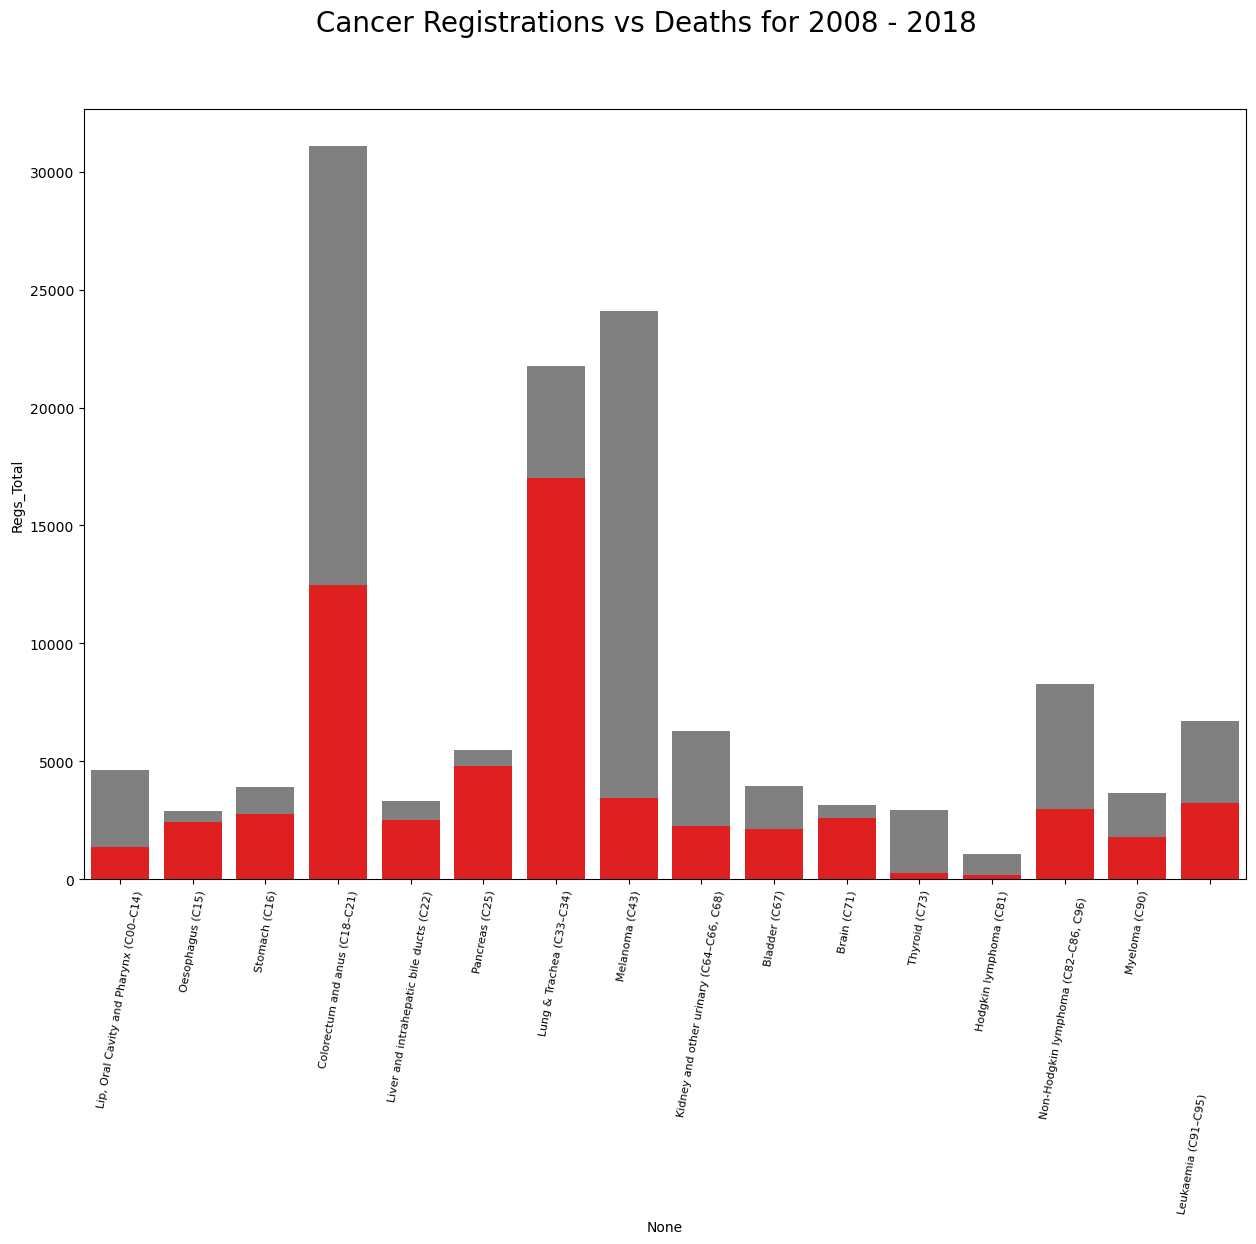

In [195]:
fig, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation=80,fontsize=8)
sns.barplot(data=compdf,x=compdf.index,y='Regs_Total',errorbar=None, color = 'grey')
sns.barplot(data=compdf,x=compdf.index,y='Deaths_Total',errorbar=None, color = 'red')
fig.suptitle('Cancer Registrations vs Deaths for 2008 - 2018', fontsize = 20)